Force (F):


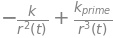

Kinetic Energy (T):



Potential Energy (V):


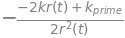


Lagrangian (L):


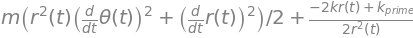


Equation of motion for r:


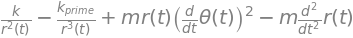


Equation of motion for θ:


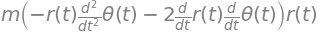


Angular momentum L_dot_theta:



Time derivative of angular momentum:


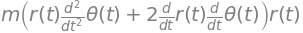

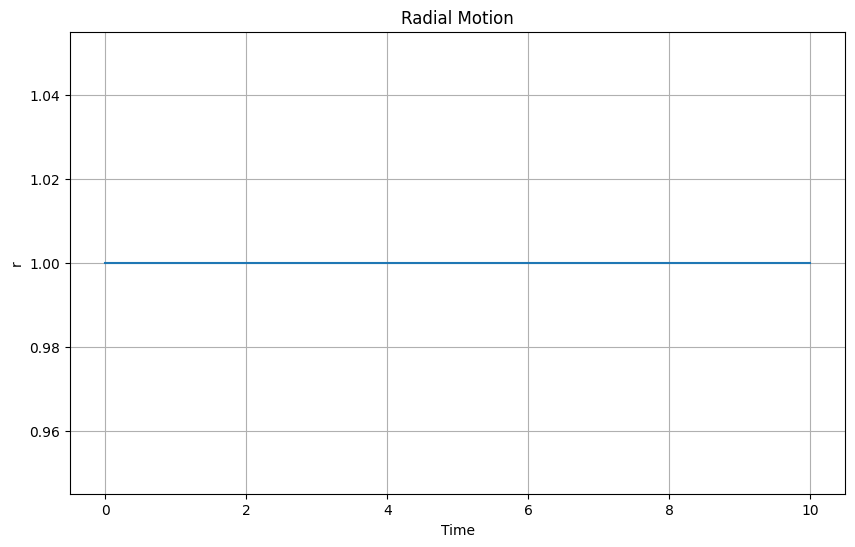

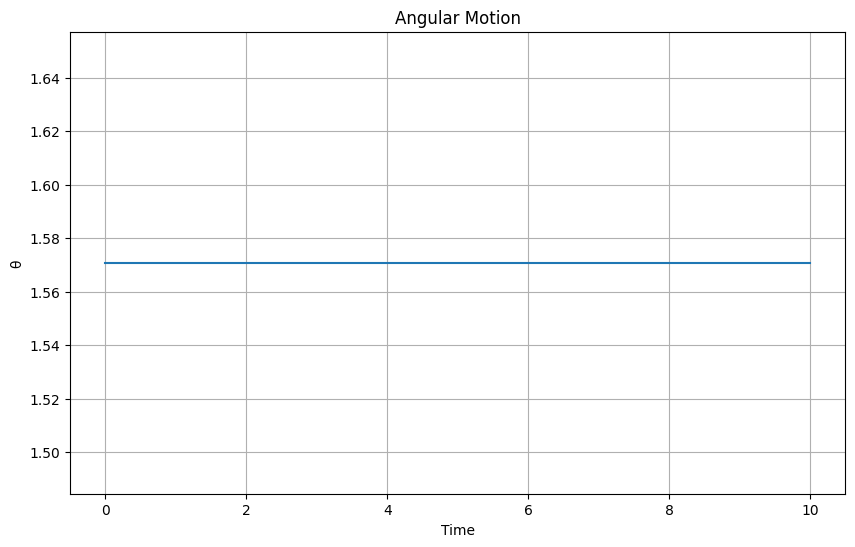

In [1]:
from sympy import symbols, Function, diff, simplify, Rational, integrate
from sympy.physics.mechanics import dynamicsymbols
from sympy import init_printing
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
from sympy.utilities.lambdify import lambdify


# Initialize printing
init_printing(use_unicode=True)

# Define symbols
m, k, k_prime, F, t = symbols('m k k_prime F t')
r, theta = dynamicsymbols('r theta')

# Define the derivatives with respect to time
r_dot = dynamicsymbols('r', 1)
theta_dot = dynamicsymbols('theta', 1)

F = -k/r**2 + k_prime/r**3

# Kinetic energy
T = Rational(1, 2) * m * (r_dot**2 + r**2 * theta_dot**2)

# Potential energy
V = integrate(F, r)

# Lagrangian
L = T - V

# Print kinetic energy, potential energy, and Lagrangian
print("Force (F):")
display(F)
print("Kinetic Energy (T):")
display(T)
print("\nPotential Energy (V):")
display(V)
print("\nLagrangian (L):")
display(L)

# Euler-Lagrange equation for r
L_r = diff(L, r) - diff(diff(L, r_dot), t)
L_r = simplify(L_r)



# Euler-Lagrange equation for theta
L_theta = diff(L, theta) - diff(diff(L, theta_dot), t)
L_theta = simplify(L_theta)

# Print equations of motion
print("\nEquation of motion for r:")
display(L_r)
rmotion = L_r


print("\nEquation of motion for θ:")
display(L_theta)
theta_motion = L_theta

# Angular momentum
L_dot_theta = diff(L, theta_dot)
L_dot_theta = simplify(L_dot_theta)

# Time derivative of angular momentum
angular_momentum_derivative = diff(L_dot_theta, t)
angular_momentum_derivative = simplify(angular_momentum_derivative)

# Print angular momentum and its time derivative
print("\nAngular momentum L_dot_theta:")
display(L_dot_theta)

print("\nTime derivative of angular momentum:")
display(angular_momentum_derivative)

# Define parameters and initial conditions
m_val = 1.0  # mass
k_val = 1.0  # spring constant
k_prime_val = 1.0  # spring constant for inverse cube force
r0 = 1.0  # initial radial position
r_dot0 = 0.0  # initial radial velocity
theta0 = np.pi/ 2  # initial angular position
theta_dot0 = 1.0  # initial angular velocity

# Substitute parameter values into equations of motion for r
rmotion_subs = rmotion.subs([(m, m_val), (k, k_val), (k_prime, k_prime_val)])

# Define a function for the right-hand side of the differential equation for r
def dr_dt(r_theta, t):
    r, theta = r_theta
    return [r_dot0, r0 * theta_dot0 ** 2 - k_val * r0 / r ** 2 + k_prime_val * r0 / r ** 3]

# Integrate the differential equations numerically
t_values = np.linspace(0, 10, 1000)  # time values for integration
r_theta_solution = odeint(dr_dt, [r0, theta0], t_values)
r_solution = r_theta_solution[:, 0]  # extract r values

# Plot r vs time
plt.figure(figsize=(10, 6))
plt.plot(t_values, r_solution)
plt.xlabel('Time')
plt.ylabel('r')
plt.title('Radial Motion')
plt.grid(True)
plt.show()


# Substitute parameter values into equations of motion for theta
theta_motion_subs = theta_motion.subs([(m, m_val), (k, k_val), (k_prime, k_prime_val)])

# Define a function for the right-hand side of the differential equation for theta
def dtheta_dt(r_theta, t):
    r, theta = r_theta
    return [theta_dot0, -2 * r_dot0 * theta_dot0 / r]

# Integrate the differential equations numerically
theta_theta_solution = odeint(dtheta_dt, [r0, theta0], t_values)
theta_solution = theta_theta_solution[:, 1]  # extract theta values

# Plot theta vs time
plt.figure(figsize=(10, 6))
plt.plot(t_values, theta_solution)
plt.xlabel('Time')
plt.ylabel('θ')
plt.title('Angular Motion')
plt.grid(True)
plt.show()

